In [2]:
import pencil as pc
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

         pencil has moved to pencil_old.
To change your scripts accordingly:
import pencilnew as pc -> import pencil as pc
import pencil as pc -> import pencil_old as pc


In [3]:
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 11})

In [4]:
param = pc.read.param()

In [5]:
grid = pc.read.grid(trim=True, quiet=True)

In [6]:
z = grid.z
x = grid.x
y = grid.y

In [87]:
# vars = np.zeros()
var = pc.read.var(var_file='VAR13', magic=['bb'], trimall=True)

In [88]:
var.keys()

t
dx
dy
dz
x
y
z
f
l1
l2
m1
m2
n1
n2
magic
bb
uu
ux
uy
uz
lnrho
aa
ax
ay
az


In [89]:
var.t

650.0093714745346

In [90]:
var.bb.shape

(3, 128, 128, 128)

In [91]:
# uz = var.uz[:,:,np.argmin(np.abs(z-0))]
uz = var.bb[2,np.argmin(np.abs(z-0)),:,:]

In [92]:
uz_ave = np.average(uz)
uz_p = uz - uz_ave
uz_p

array([[2.21786581e-04, 1.95045756e-04, 1.68248095e-04, ...,
        2.78695476e-04, 2.65183551e-04, 2.45837605e-04],
       [1.80741275e-04, 1.55305409e-04, 1.31822316e-04, ...,
        2.47275604e-04, 2.28532333e-04, 2.05837921e-04],
       [1.41090163e-04, 1.17198523e-04, 9.69971093e-05, ...,
        2.15416596e-04, 1.92124636e-04, 1.66738821e-04],
       ...,
       [3.09869139e-04, 2.82553724e-04, 2.49186612e-04, ...,
        3.32234258e-04, 3.35098650e-04, 3.27843618e-04],
       [2.89584365e-04, 2.61994412e-04, 2.30131348e-04, ...,
        3.23163946e-04, 3.20963996e-04, 3.09779958e-04],
       [2.59423781e-04, 2.31953025e-04, 2.02277327e-04, ...,
        3.04979164e-04, 2.97154555e-04, 2.81776094e-04]])

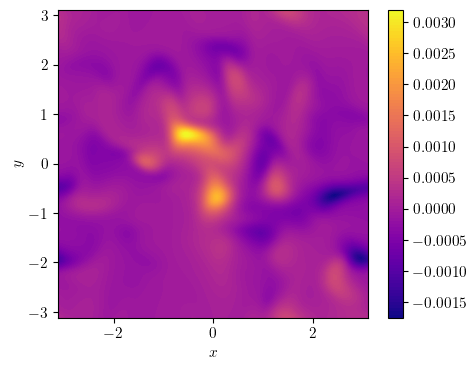

In [93]:
X, Y = np.meshgrid(x, y)
fig = plt.figure(figsize=(5,4.0))
plt.contourf(X, Y, uz_p, 100, cmap='plasma')
plt.colorbar()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

In [51]:
uz_f = np.fft.fftshift(np.fft.fft2(uz_p, norm='ortho'))

In [52]:
power_2d = np.abs(uz_f)**2

In [53]:
kx = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(len(x), d=(x[1]-x[0])))
ky = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(len(y), d=(y[1]-y[0])))

In [54]:
(x[-1]-x[0])/128
x_min = (x[1]-x[0])
x_min
kx_max = 2*np.pi/x_min
kx_max
x_max = x[-1]-x[0]
x_max
kx_min = 2*np.pi/x_max
kx_min


1.007873239077751

In [55]:
# size = np.shape(uz)
# lxyz = param.lxyz   #shape of the box
# #size
# nx = size[1]
# lx = lxyz[0]
# dkx = 2*np.pi/lx    #unit step along kx direction

In [56]:
# if nx%2 == 0:
#     fnx = np.arange(0, nx/2)
#     rnx = -np.flip(np.arange(1, nx/2+1))
#     kx = np.concatenate((fnx, rnx))*dkx
# else:
#     fnx = np.arange(0, nx/2)
#     rnx = -np.flip(np.arange(1, nx/2))
#     kx = np.concatenate((fnx, rnx))*dkx
# kx = np.fft.fftshift(kx)

In [57]:
# kx = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(len(x), d=(x[1]-x[0])))
# ky = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(len(y), d=(y[1]-y[0])))

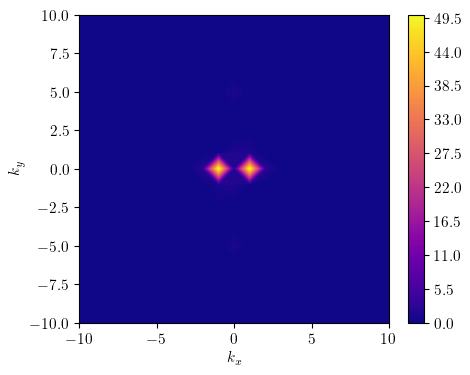

In [58]:
full = True
X, Y = np.meshgrid(kx, ky)
fig = plt.figure(figsize=(5,4.0))
plt.contourf(X, Y, power_2d, 100 , cmap='plasma')
plt.colorbar()
if full==True:
    llim = -10
else:
    llim = 0
plt.xlim(llim,10)
plt.ylim(llim,10)
plt.xlabel(r'$k_x$')
plt.ylabel(r'$k_y$')
plt.savefig('uz.png')
plt.show()

In [59]:
kfreq2D = np.meshgrid(kx, ky)

In [60]:
# kfreq2D.shape

In [61]:
knrm = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)

In [62]:
kfreq2D[0].shape

(128, 128)

In [63]:
knrm

array([[90.50941133, 89.80509038, 89.10642495, ..., 88.41354911,
        89.10642495, 89.80509038],
       [89.80509038, 89.09520177, 88.39092537, ..., 87.6923964 ,
        88.39092537, 89.09520177],
       [89.10642495, 88.39092537, 87.68099222, ..., 86.97676181,
        87.68099222, 88.39092537],
       ...,
       [88.41354911, 87.6923964 , 86.97676181, ..., 86.26678267,
        86.97676181, 87.6923964 ],
       [89.10642495, 88.39092537, 87.68099222, ..., 86.97676181,
        87.68099222, 88.39092537],
       [89.80509038, 89.09520177, 88.39092537, ..., 87.6923964 ,
        88.39092537, 89.09520177]])

In [64]:
knrm = knrm.flatten()
fourier_amplitudes = power_2d.flatten()

In [65]:
knrm.shape

(16384,)

In [66]:
fourier_amplitudes.shape

(16384,)

In [67]:
npix = power_2d.shape[0]

In [68]:
npix

128

In [69]:
kbins = np.arange(0.5, npix//2+1, 1.)
kbins

array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
       11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
       22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
       33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
       44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5,
       55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5])

In [70]:
kvals = 0.5 * (kbins[1:] + kbins[:-1])
kvals

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.])

In [71]:
fourier_amplitudes.shape

(16384,)

In [72]:
knrm.shape

(16384,)

In [73]:
import scipy.stats as stats

Abins, _, _ = stats.binned_statistic(knrm, fourier_amplitudes,
                                     statistic = "mean",
                                     bins = kbins)

In [74]:
Abins *= np.pi * (kbins[1:]**2 - kbins[:-1]**2)

In [75]:
Abins.shape

(64,)

In [76]:
def func(x, a, b):
    return a*x**b

In [77]:
kk = kvals[np.argmin(np.abs(kvals-7)):np.argmin(np.abs(kvals-20))]
ppss = Abins[np.argmin(np.abs(kvals-7)):np.argmin(np.abs(kvals-20))]

In [78]:
para, _ = curve_fit(func, kk, ppss)
ps_fit = func(kk, *para)

In [79]:
para[1]

-4.115209624489147

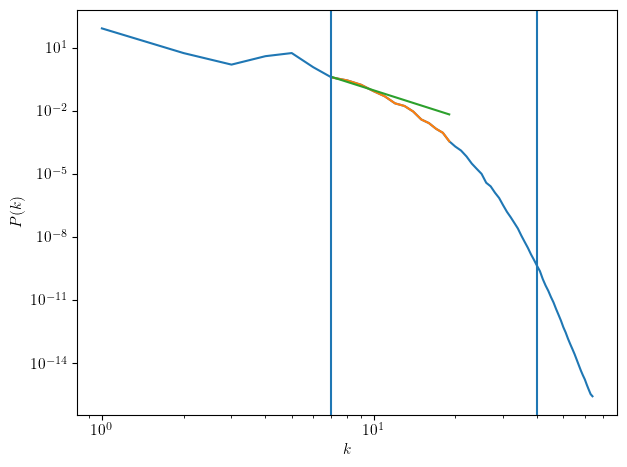

In [80]:
plt.loglog(kvals, Abins)
# plt.plot(kvals, Abins)
plt.plot(kk, ppss)
plt.plot(kk, ps_fit)
plt.axvline(x=7)
plt.axvline(x=40)
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel("$k$")
plt.ylabel("$P(k)$")
plt.tight_layout()
plt.savefig("cloud_power_spectrum.png", dpi = 300, bbox_inches = "tight")

In [81]:
power = pc.read.power()

power_krms.dat
power_mag.dat
powerhel_kin.dat
power_kin.dat
powerhel_mag.dat
poweruz_xy.dat


In [83]:
power.keys()

t
krms
mag
hel_kin
kin
hel_mag
kx
ky
zpos
nzpos
uz_xy


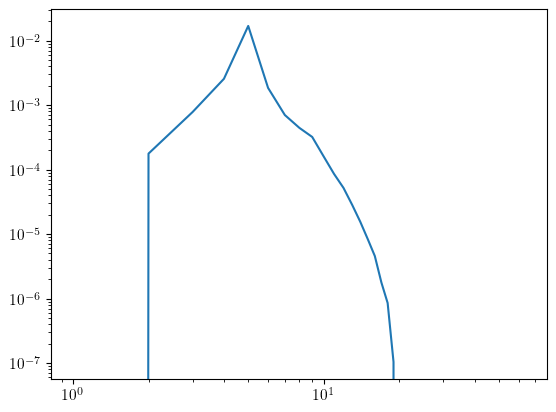

In [85]:
plt.loglog(power.hel_kin[np.argmin(np.abs(power.t-var.t)),:])

In [44]:
power.keys()

t
krms
mag
hel_kin
kin
hel_mag
kx
ky
zpos
nzpos
uz_xy


In [45]:
power.zpos

array([3.14])

In [46]:
power.kx

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63.])

In [47]:
var.t

6500.002347158456

In [48]:
power.t[np.argmin(np.abs(power.t-var.t))]

6500.014

In [49]:
power.uz_xy.shape

(1406, 1, 64, 64)

In [56]:
uz_xy = power.uz_xy[np.argmin(np.abs(power.t-var.t)),0,:,:]

(0.0, 10.0)

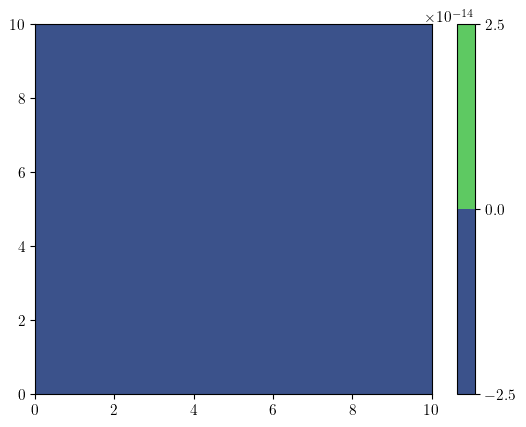

In [57]:
X, Y = np.meshgrid(kx[64:], ky[64:])
plt.contourf(X, Y, np.abs(uz_xy)**2)
# plt.plot(power.mag[np.argmin(np.abs(power.t-10)),:])
plt.colorbar()
plt.xlim(0,10)
plt.ylim(0,10)

In [51]:
np.max(power.uz_xy)

0j

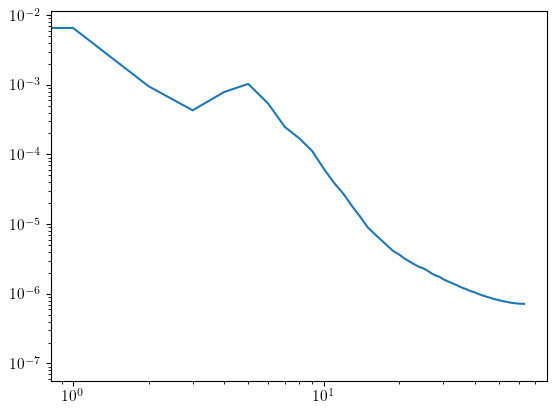

In [54]:
# plt.contourf(uz_xy)
plt.loglog(power.mag[np.argmin(np.abs(power.t-var.t)),:])